In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import torch


In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [79]:
data_path_list = glob.glob("/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/*/")
data_path_list

['/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/no-object/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/point-spirals-new/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/LSBGs/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/point-spirals/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/Tanoglidis 2021/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/fromlixulens/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/merger/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/lens_new/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/lens/',
 '/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/Known lensed quasars/']

In [ ]:
data_path_list = glob.glob("/home/amax/ljm/DATA/Desi_galaxyzoo2_fits/DATAdesi/*/*/*.jpg")
data_path_list_random = random.sample(data_path_list, 1000)
image_list = []
image_name_list = []
for i in data_path_list_random:
   image = Image.open(i)
   image_list.append(image)
   image_name_list.append(i)

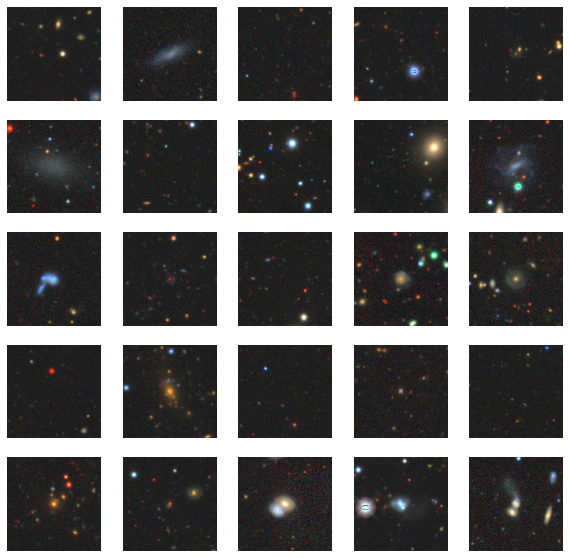

In [60]:
# 随机展示25张数据
plt.figure(figsize=(10, 10))
for i, image in enumerate(image_list[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [67]:
inputs = processor(text=["There are two galaxies in the figure"], images=image_list, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image 
probs = logits_per_image.softmax(dim=0)[:,0]


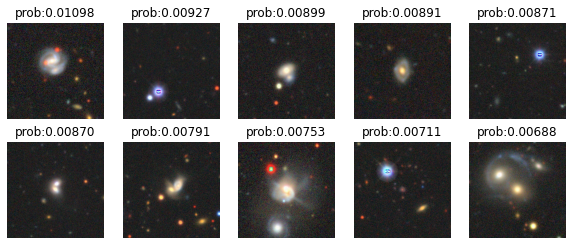

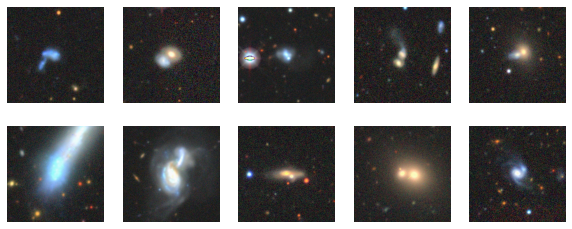

In [83]:
max_probs, max_indices = torch.topk(probs, 10)

plt.figure(figsize=(10, 4))
for i, (index, prob) in enumerate(zip(max_indices, max_probs), 1):
    plt.subplot(2, 5, i)
    plt.imshow(image_list[index])
    plt.title(f"prob:{prob.item():.5f}")
    plt.axis("off")
plt.show()

merger_image_list = [per for per in image_name_list if "merger" in per]

plt.figure(figsize=(10, 4))
for i, image in enumerate(merger_image_list[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(Image.open(image))
    plt.axis("off")
plt.show()


In [69]:
inputs = processor(text=["blue galaxy"], images=image_list, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image 
probs = logits_per_image.softmax(dim=0)[:,0]

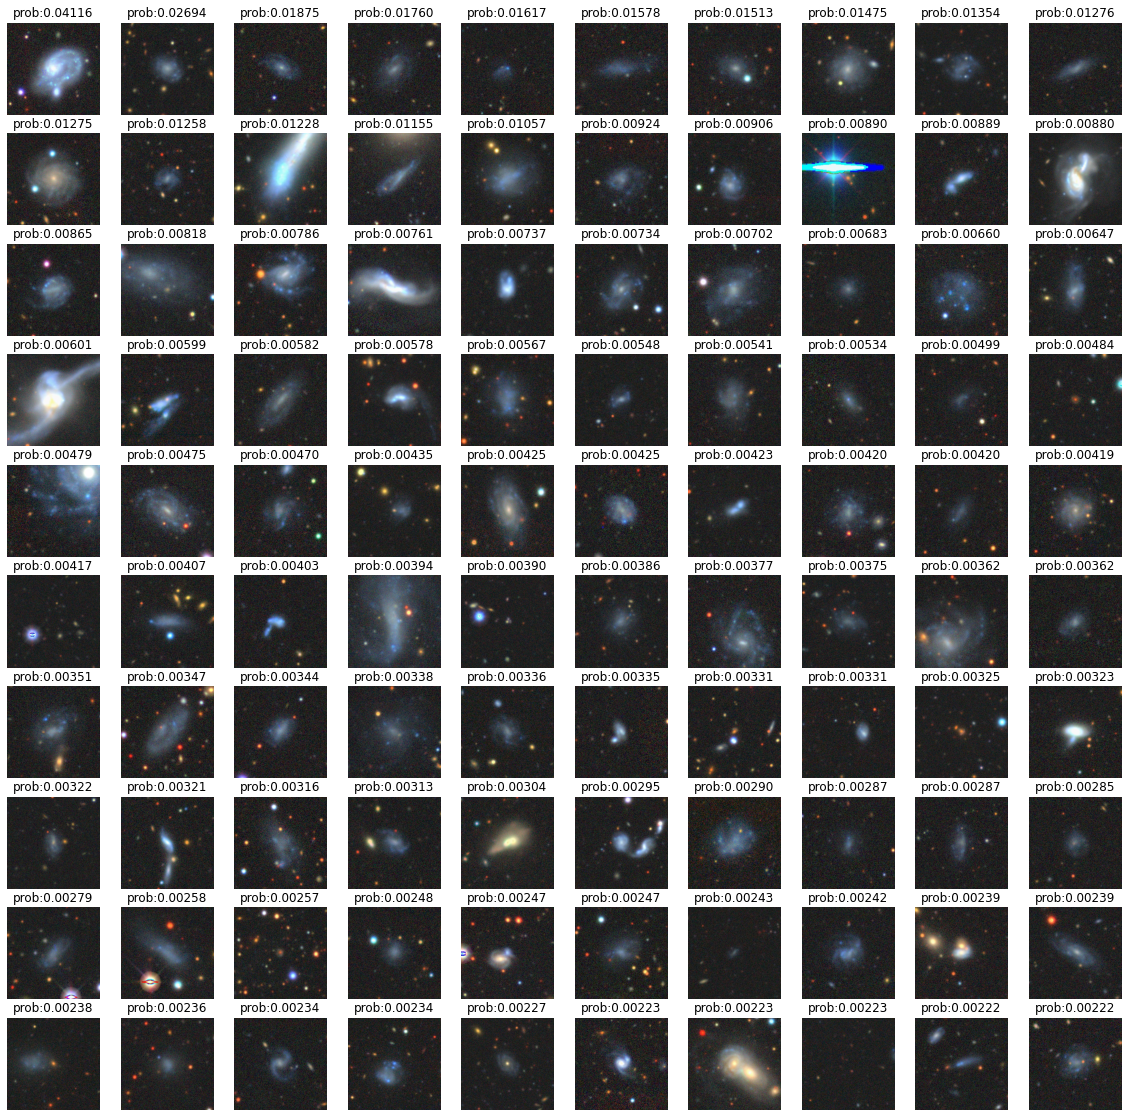

In [72]:
import torch
max_probs, max_indices = torch.topk(probs, 100)

plt.figure(figsize=(20, 20))
for i, (index, prob) in enumerate(zip(max_indices, max_probs), 1):
    plt.subplot(10, 10, i)
    plt.imshow(image_list[index])
    plt.title(f"prob:{prob.item():.5f}")
    plt.axis("off")
plt.show()


In [75]:
inputs = processor(text=["Strong gravitational lens"], images=image_list, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image 
probs = logits_per_image.softmax(dim=0)[:,0]

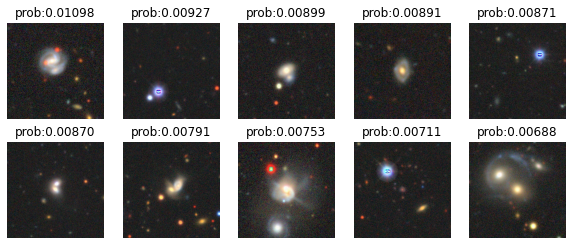

In [76]:
import torch
max_probs, max_indices = torch.topk(probs, 10)

plt.figure(figsize=(10, 4))
for i, (index, prob) in enumerate(zip(max_indices, max_probs), 1):
    plt.subplot(2, 5, i)
    plt.imshow(image_list[index])
    plt.title(f"prob:{prob.item():.5f}")
    plt.axis("off")
plt.show()
